# Homework : 8 Machine Learning - 1 (Supervised Methods)

## Whitening and Simulation of Gaussian Random Vectors

### Importing all necessary libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Initializing the mean vector and covariance matrix.

In [2]:
mean_vector = np.array([2, 1])
covariance_matrix = np.array([[4, 1], 
                              [1, 2]])

### Using np.random.normal(0,1,.) to generate i.i.d. standard normal realization of dimension 2

In [3]:
X_vector = np.random.normal(0, 1, size=(5000, 2))
X_vector.shape

(5000, 2)

### Produce a scatter plot with 5000 realizations of the random vector 𝑥⃗. Explain your method.

In [4]:
# calculate eigen vectors and eigen values from the Covariance Matrix.
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

### Performing Orthonormal transformation on the X_vector using Orthonormal Transformation and generating the Y_vector

In [5]:
orthonormal_matrix = eigen_vectors.T
orthonormal_matrix.shape

(2, 2)

In [6]:
Y_vector = np.dot(orthonormal_matrix, X_vector.T).T
Y_vector.shape

(5000, 2)

### Mean of the Orthonormally Transformed X_Vector before adding the shifted mean

In [7]:
current_mean = np.mean(Y_vector, axis = 0)
current_mean

array([0.00704778, 0.00629367])

In [8]:
# calculate shift vector shift_mean
shifted_mean = mean_vector - np.mean(Y_vector, axis = 0)

# apply transformation to X_vector
Y_vector = np.dot(orthonormal_matrix, X_vector.T).T + shifted_mean

In [9]:
Y_vector.shape

(5000, 2)

In [10]:
np.mean(Y_vector, axis = 0)

array([2., 1.])

Text(0, 0.5, 'X2')

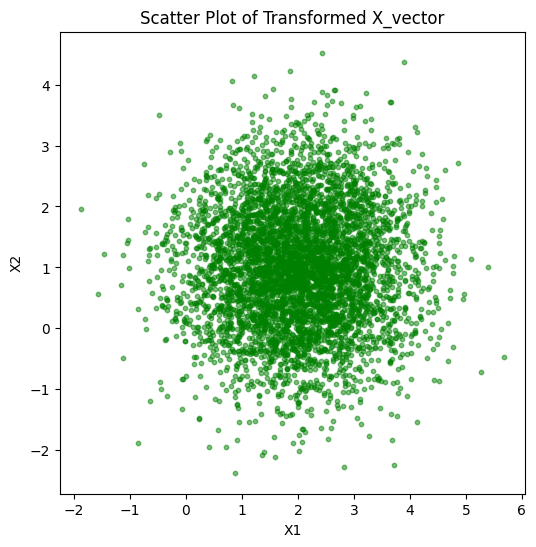

In [11]:
# Set the figure size to 6 inches by 6 inches
plt.figure(figsize=(6, 6))

# Plot the scatter plot of the y_vector
plt.scatter(Y_vector[:, 0], Y_vector[:, 1], alpha=0.5, c= "green",s=10)
plt.title('Scatter Plot of Transformed X_vector')
plt.xlabel('X1')
plt.ylabel('X2')



## 2] (b) (i) Generate 5000 realizations of a zero-mean, white, Gaussian random vector 𝑤. Plot a scatter plot of these realizations. A white random vector is one with identity covariance matrix and zero mean.

Text(0, 0.5, 'W2')

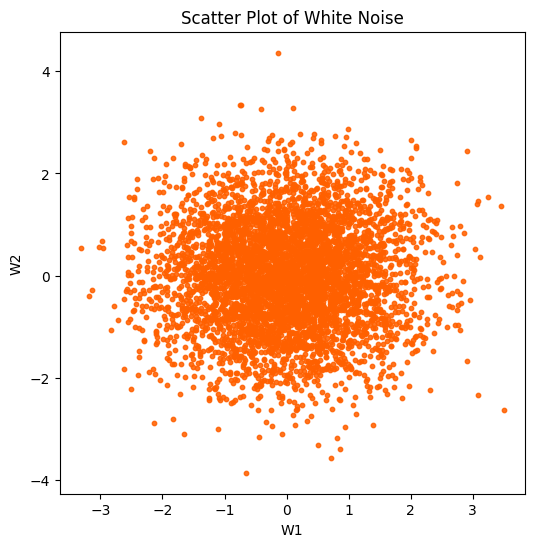

In [69]:
W_vector = np.random.normal(0, 1, size=(5000, 2))
# Set the figure size to 6 inches by 6 inches
plt.figure(figsize=(6, 6))

# Plot the scatter plot of the y_vector
plt.scatter(W_vector[:, 0], W_vector[:, 1], alpha=0.87, c= "#FF6000", s=10)
plt.title('Scatter Plot of White Noise')
plt.xlabel('W1')
plt.ylabel('W2')

## 2] (b) ii] Let 𝑦 = A𝑤 where A = [[-1, -1], [2, 4]]. What are the mean and variances of the two components of 𝑦?

### Perform transformation of the white noise W_vector to Y_vector

In [20]:
A = [[-1, -1],
     [2, 4]]

Y_vector = (A@W_vector.T).T
Y_vector.shape

(5000, 2)

In [39]:
Y_vector_mean = np.mean(Y_vector, axis = 0)
Y_vector_variance = np.square(np.std(Y_vector, axis = 0))
Y_vector_std = np.std(Y_vector, axis = 0)

### What is the correlation coefficient rij ?

In [31]:
sample_cov_matrix = np.cov(Y_vector.T)

In [42]:
sigma_ij = sample_cov_matrix[1][0]
sigma_i = Y_vector_std[0]
sigma_j = Y_vector_std[1]

In [46]:
rij = sigma_ij/ (sigma_i * sigma_j)


The Correlation Co-efficient is -0.9480181301620987


In [47]:
print(f"The mean of the Y_vector is: {Y_vector_mean}")
print(f"The Variance of the Y_vector is: {Y_vector_variance}")
print(f"The Correlation Co-efficient is {rij}")

The mean of the Y_vector is: [ 0.01240198 -0.02151452]
The Variance of the Y_vector is: [ 1.9699015  19.80995201]
The Correlation Co-efficient is -0.9480181301620987


### Are the positively or negatively correlated?

The correlation coefficient measures the linear relationship between two variables. It takes values between -1 and 1, where -1 indicates a perfectly negative correlation (i.e., as one variable increases, the other variable decreases), 0 indicates no correlation, and 1 indicates a perfectly positive correlation (i.e., as one variable increases, the other variable also increases).

### Since, we got rij to be -0.9480181301620987, we can clearly see that the data is negatively correlated.

### Produce a scatter plot for the values of y obtained from the 5000 realizations of w.

Text(0, 0.5, 'Y2')

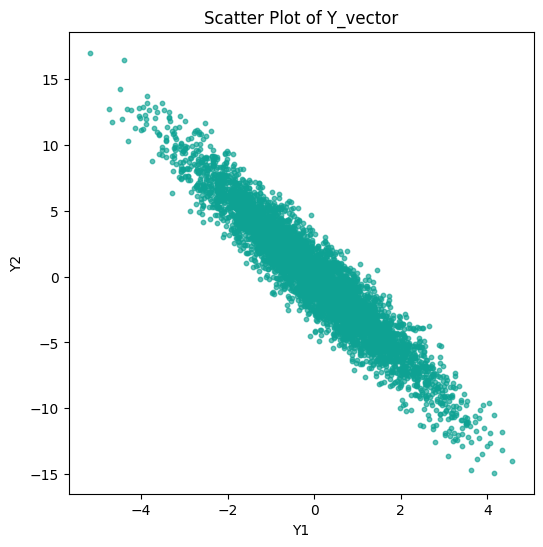

In [70]:
# Set the figure size to 6 inches by 6 inches
plt.figure(figsize=(6, 6))

# Plot the scatter plot of the y_vector
plt.scatter(Y_vector[:, 0], Y_vector[:, 1], alpha=0.65, c= "#0EA293", s=10)
plt.title('Scatter Plot of Y_vector')
plt.xlabel('Y1')
plt.ylabel('Y2')

### Sample Covariance Matrix.

In [48]:
sample_cov_matrix

array([[ 1.97029556, -5.92216646],
       [-5.92216646, 19.81391479]])

### Consider decorrelating, then whitening 𝑦. First, define 𝑣 = E/𝑦, where E is the 2 x 2 matrix of orthonormal eigen-vectors of the covariance matrix of 𝑦.

In [57]:
# calculate eigen vectors and eigen values from the Covariance Matrix.
eigen_values_new, eigen_vectors_new = np.linalg.eig(sample_cov_matrix)

orthonormal_matrix_new = eigen_vectors_new.T

V_vector = np.dot(orthonormal_matrix_new, Y_vector.T).T


In [58]:
V_vector.shape

(5000, 2)

### What is the covariance matrix of 𝑣?

In [59]:
cov_matrix_v = np.cov(V_vector.T)
print("Covariance Matrix of V_vector is: ")
print(cov_matrix_v)

Covariance Matrix of V_vcetors is: 
[[1.83662601e-01 7.94545688e-16]
 [7.94545688e-16 2.16005478e+01]]


### Produce a scatter plot of the corresponding 5000 realizations of 𝑣, produced by 𝑣 = E/𝑦 using the realization of 𝑦 from the previous part.

Text(0, 0.5, 'Y2')

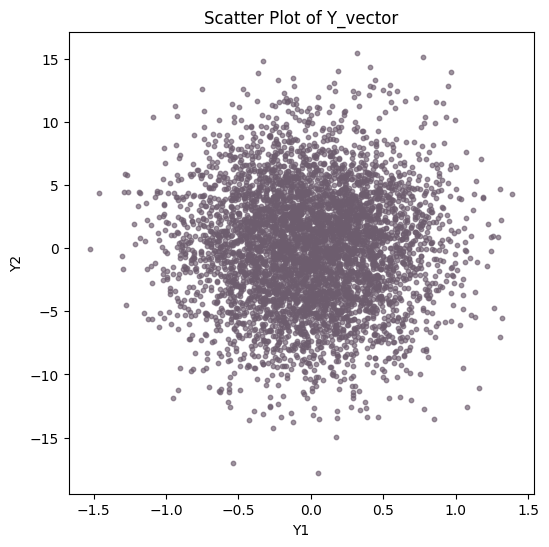

In [60]:
# Set the figure size to 6 inches by 6 inches
plt.figure(figsize=(6, 6))

# Plot the scatter plot of the y_vector
plt.scatter(V_vector[:, 0], V_vector[:, 1], alpha=0.65, c= "#6D5D6E", s=10)
plt.title('Scatter Plot of V_vector')
plt.xlabel('V1')
plt.ylabel('V2')

### Let 𝑧 = ⋀ ^ -1/2. V_vector.

In [65]:
eigen_values_matrix = np.diag([np.sqrt(eigen_values_new[0]), np.sqrt(eigen_values_new[1])])
Z_vector = np.dot(eigen_values_matrix, V_vector.T).T
Z_vector.shape

(5000, 2)

In [67]:
cov_matrix_z = np.cov(Z_vector.T)
print("Covariance Matrix of Z_vector is: ")
print(cov_matrix_z)

Covariance Matrix of Z_vector is: 
[[3.37319509e-02 1.54929302e-15]
 [1.54929302e-15 4.66583663e+02]]


### Produce a scatter plot of the corresponding 5000 realizations of Z_vector

Text(0, 0.5, 'Z2')

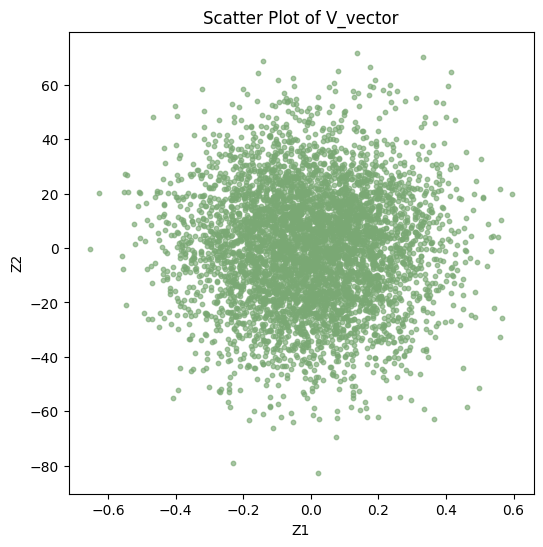

In [68]:
# Set the figure size to 6 inches by 6 inches
plt.figure(figsize=(6, 6))

# Plot the scatter plot of the y_vector
plt.scatter(Z_vector[:, 0], Z_vector[:, 1], alpha=0.65, c= "#7AA874", s=10)
plt.title('Scatter Plot of Z_vector')
plt.xlabel('Z1')
plt.ylabel('Z2')

### (v) Discuss the relationship between 𝑤 and 𝑧. Specifically, answer the following questions. What is the pdf of 𝑤 and the pdf of 𝑧? Is 𝑧 = 𝑤 -- i.e., since we colored 𝑤 to get 𝑦, then we whitened 𝑦 to get 𝑧? If not explain why.